In [15]:
import pandas as pd
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
ruta_parquet_games = "datasets/data_steam_games.parquet.gz"
ruta_parquet_reviews = "datasets/data_reviews.parquet.gz"
ruta_parquet_items = "datasets/data_items.parquet.gz"

df_games = pd.read_parquet(ruta_parquet_games)
df_reviews = pd.read_parquet(ruta_parquet_reviews)
df_items = pd.read_parquet(ruta_parquet_items)

primeras filas de cada DataFrame

In [4]:
df_items.head()

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,30,Day of Defeat,7
3,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,50,Half-Life: Opposing Force,0


In [5]:
df_reviews.head()

,user_id,item_id,posted,recommend,sentiment_analysis
0,76561197970982479,1250,2011,True,2
1,76561197970982479,22200,2011,True,2
2,76561197970982479,43110,2011,True,2
3,js41637,251610,2014,True,2
4,js41637,227300,2013,True,0


In [6]:
df_games.head()

,genres,release_date,item_id,year
0,['Action'],1998-11-08,70.0,1998
1,['Strategy'],2006-07-06,1640.0,2006
2,['Strategy'],2006-07-06,1630.0,2006
3,['Action',2006-07-11,2400.0,2006
4,'Indie',2006-07-11,2400.0,2006


tamaño de cada DataFrame

In [7]:
"Tamaño de data_items:", df_items.shape

('Tamaño de data_items:', (5094092, 4))

In [8]:
"Tamaño de data_reviews:", df_reviews.shape

('Tamaño de data_reviews:', (58431, 5))

In [9]:
"Tamaño de data_games:", df_games.shape

('Tamaño de data_games:', (5316, 4))

Resumen estadístico de las columnas numéricas

In [10]:
df_reviews.describe()

,item_id,posted,sentiment_analysis
count,58431.000000,58431.000000,58431.000000
mean,169703.670586,2014.462956,1.350875
std,132019.789420,1.035941,0.810786
min,10.000000,2010.000000,0.000000
25%,8930.000000,2014.000000,1.000000
50%,218230.000000,2014.000000,2.000000
75%,261640.000000,2015.000000,2.000000
max,527340.000000,2016.000000,2.000000


In [11]:
df_games.describe()

,item_id,year
count,5316.000000,5316.000000
mean,268070.584838,2012.847065
std,161755.897658,3.982527
min,10.000000,1993.000000
25%,204510.000000,2011.000000
50%,263340.000000,2014.000000
75%,367500.000000,2016.000000
max,901776.000000,2017.000000


In [12]:
df_items.describe()

,item_id,playtime_forever
count,5.094092e+06,5.094092e+06
mean,1.783916e+05,9.905144e+02
std,1.318515e+05,5.414110e+03
min,1.000000e+01,0.000000e+00
25%,3.445000e+04,0.000000e+00
50%,2.144200e+05,3.400000e+01
75%,2.664300e+05,3.550000e+02
max,5.307200e+05,6.427730e+05


Este histograma mostrará la distribución de revisiones recomendadas y no recomendadas

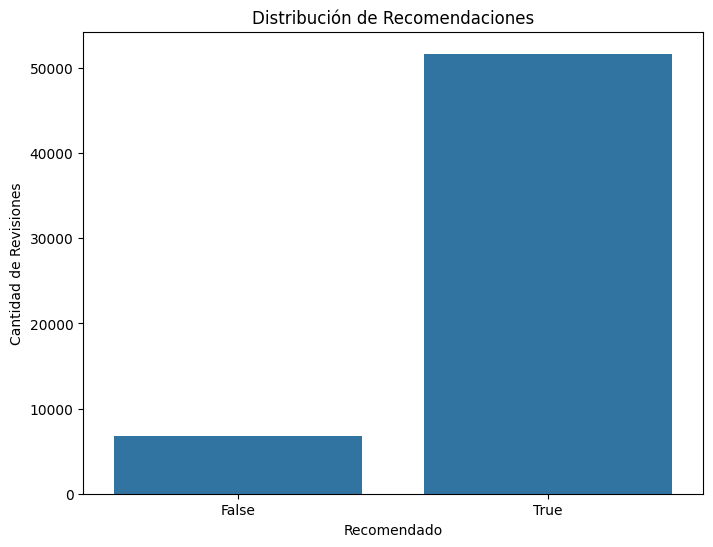

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot de recomendaciones
plt.figure(figsize=(8, 6))
sns.countplot(data=df_reviews, x='recommend')
plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendado')
plt.ylabel('Cantidad de Revisiones')
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_1708\2146761749.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_users.index, y=active_users.values, palette='viridis')


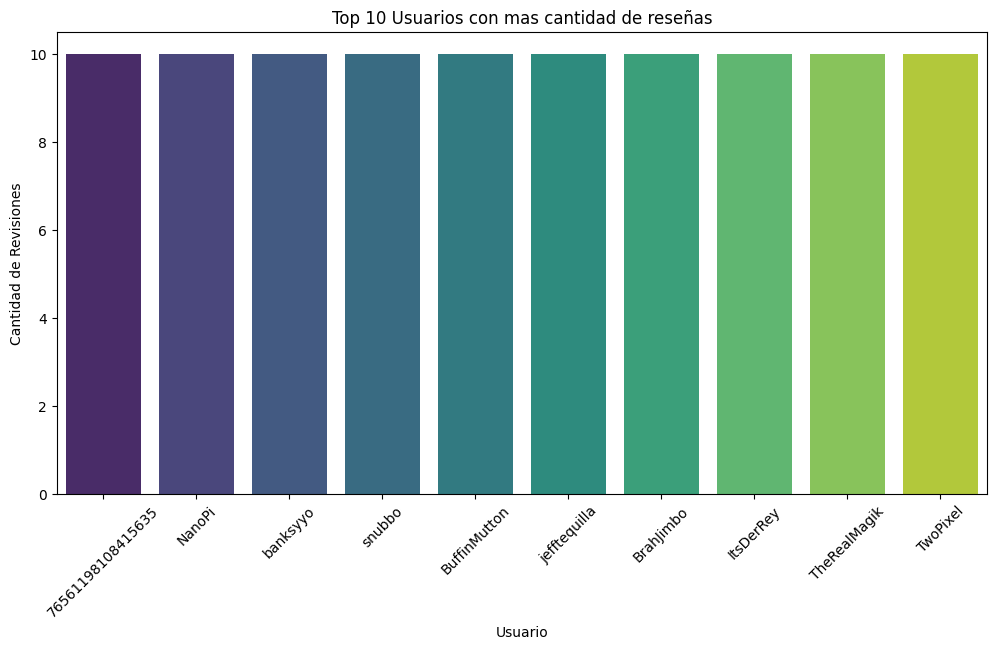

In [30]:
# Contar el número de revisiones por usuario y obtener los N usuarios más activos
top_n_users = 10
active_users = df_reviews['user_id'].value_counts().head(top_n_users)

# Gráfico de barras de usuarios más activos
plt.figure(figsize=(12, 6))
sns.barplot(x=active_users.index, y=active_users.values, palette='viridis')
plt.title(f'Top {top_n_users} Usuarios con mas cantidad de reseñas')
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Revisiones')
plt.xticks(rotation=45)
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_1708\1162169614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')


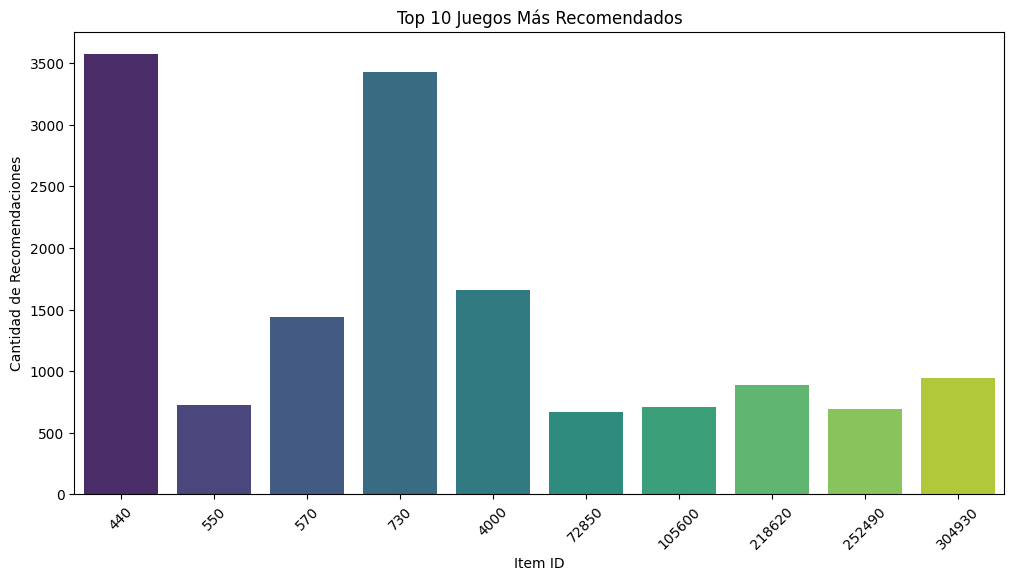

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de veces que cada elemento ha sido recomendado
top_items = df_reviews[df_reviews['recommend'] == True]['item_id'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')
plt.title('Top 10 Juegos Más Recomendados')
plt.xlabel('Item ID')
plt.ylabel('Cantidad de Recomendaciones')
plt.xticks(rotation=45)
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_1708\630593368.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


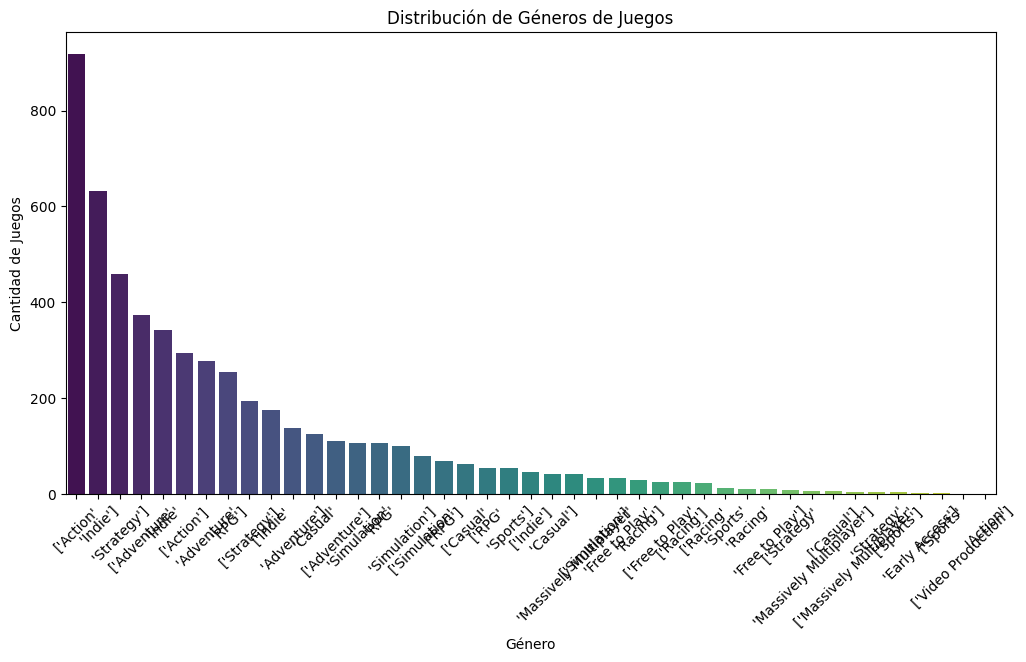

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de juegos en cada género
genre_counts = df_games['genres'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribución de Géneros de Juegos')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_1708\1551661080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_played_games, x='playtime_forever', y='item_name', palette='viridis')


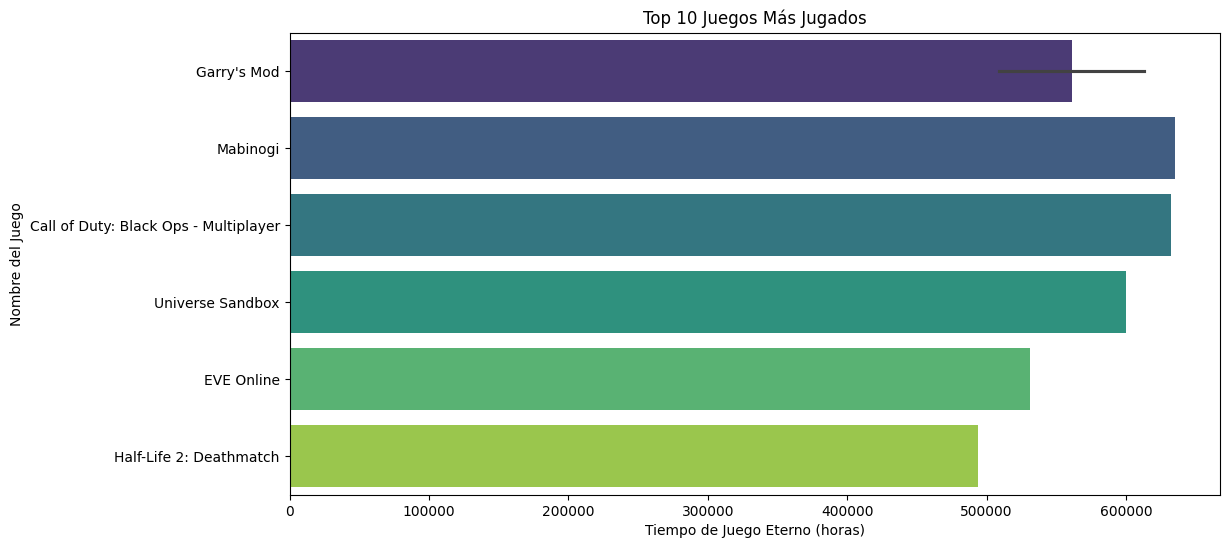

In [38]:
# Obtener los 10 juegos más jugados
top_10_played_games = df_items.nlargest(10, 'playtime_forever')

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_played_games, x='playtime_forever', y='item_name', palette='viridis')
plt.title('Top 10 Juegos Más Jugados')
plt.xlabel('Tiempo de Juego Eterno (horas)')
plt.ylabel('Nombre del Juego')
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_1708\2722807624.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


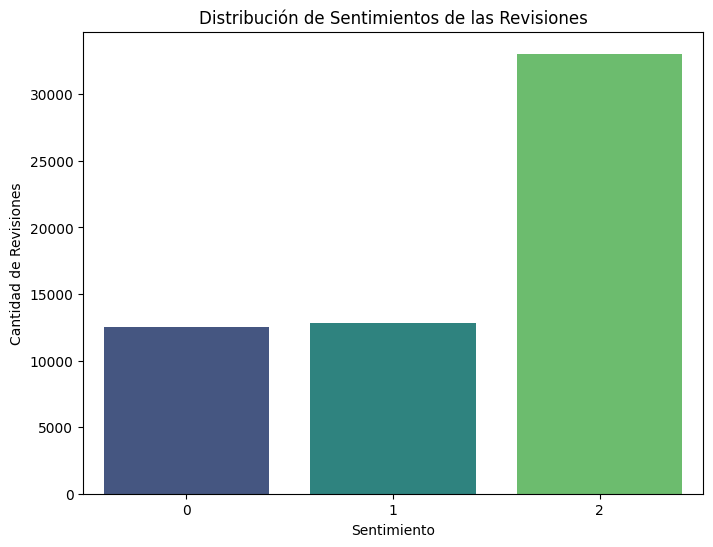

In [40]:
# Contar la cantidad de revisiones con diferentes sentimientos
sentiment_counts = df_reviews['sentiment_analysis'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribución de Sentimientos de las Revisiones')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Revisiones')
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_1708\3050136820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')


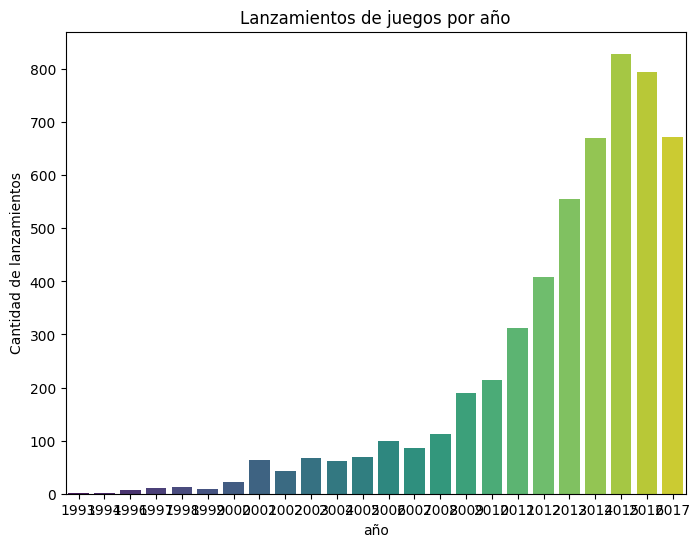

In [42]:
# Lanzamientos por año
year_counts = df_games['year'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Lanzamientos de juegos por año')
plt.xlabel('año')
plt.ylabel('Cantidad de lanzamientos')
plt.show()
